# K-Means Clustering in Python -- Synthetic Data

This jupyter notebook accompanies the Real Python's [Practical K-Means Clustering in Python](https://realpython.com/practical-k-means-clustering-python/) article. Specifically, this notebook works through the **first half** of the article, when working with synthetic data.

## K-Means Clustering in Python

### Part 1 使用sklearn.cluster的Kmeans，將400筆資料分為4群，繪圖出來

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [429]:
features, true_labels = make_blobs(
    n_samples=400, centers=4, cluster_std=2.75, random_state=42
)

In [430]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [431]:
kmeans = KMeans(
    init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42
)

In [432]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

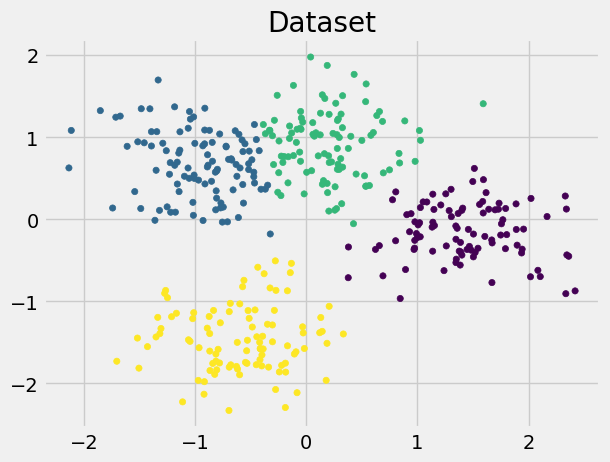

In [433]:
plt.figure()
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=kmeans.labels_, s=20)
plt.title('Dataset')
plt.show()

### Part 2 自行寫出演算法將上述標準化後的資料分群、繪圖，和上述結果進行比較

In [434]:
import random

idx = random.sample(range(scaled_features.shape[0]+1), 4)
# 1.先隨機選出4個點，作為初始重心
init_mess_centers = scaled_features[idx]
init_mess_centers

array([[ 0.77624937,  0.23555903],
       [ 1.34992984, -0.48803884],
       [-0.22790228,  0.28646549],
       [ 0.10801904,  0.77032552]])

In [435]:
# 2.將每一點分別計算出到4個重心距離，選擇距離最近的那一點，作為分群依據
def assign_cluster(features, centers):
    labels = []
    for feature in features:
        distances = [sum((center - feature) ** 2) for center in centers]
        labels.append(distances.index(min(distances)))
    return labels

labels = assign_cluster(scaled_features, init_mess_centers)

In [436]:
# 3.分為四群後，每群中再自行計算出平均值，做為新的重心
import numpy as np
def update_centers(features, labels):
    new_centers = []
    for i in range(4):
        cluster_features = [feature for feature, label in zip(features, labels) if label == i]
        new_center = np.mean(cluster_features, axis=0)
        new_centers.append(new_center)
    return new_centers

new_centers = update_centers(scaled_features, labels)
new_centers

[array([0.94299378, 0.27323226]),
 array([ 1.22793914, -0.55361669]),
 array([-0.82711608, -0.317856  ]),
 array([-0.00931716,  1.05213727])]

In [437]:
# 4.若新的重心和原來相同(沒有變化)，則結束分群，否則繼續進行2~3步驟，直至重心不變
while (True):
    old_centers = new_centers.copy()
    labels = assign_cluster(scaled_features, new_centers)
    new_centers = update_centers(scaled_features, labels)
    if np.array_equal(old_centers, new_centers):
        break

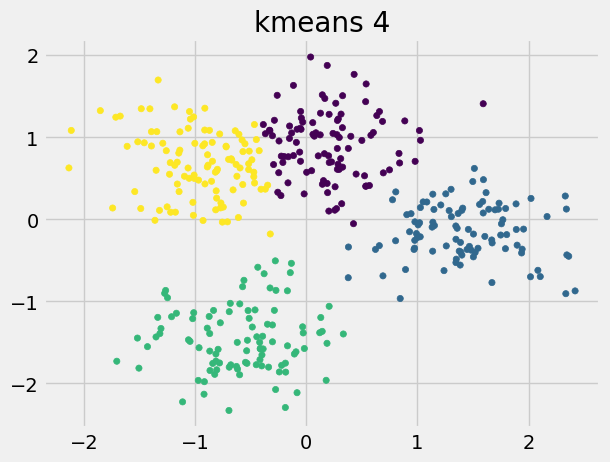

In [438]:
plt.figure()
plt.scatter(scaled_features[:,0], scaled_features[:,1], s=20, c=labels)
plt.title("kmeans 4")
plt.show()